## Observations and Insights 

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_metadata_path)
study_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mergedMice = pd.merge(mouse_df, study_df, on ="Mouse ID", how = "inner")


# Display the data table for preview
mergedMice



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Checking the number of mice.
mergedMice["Mouse ID"].count()

1893

In [15]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
cleanMice = mergedMice.drop_duplicates(subset=["Mouse ID","Timepoint"])
cleanMice.head(22)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [16]:
# Checking the number of mice in the clean DataFrame.
cleanMice["Mouse ID"].count()

1888

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

groupedMice = cleanMice.groupby(["Drug Regimen"])
meanMice = groupedMice["Tumor Volume (mm3)"].mean()
medianMice =groupedMice["Tumor Volume (mm3)"].median()
varianceMice =groupedMice["Tumor Volume (mm3)"].var()
stdMice =groupedMice["Tumor Volume (mm3)"].std()
semMice =groupedMice["Tumor Volume (mm3)"].sem()



In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
groupedMice = cleanMice.groupby(["Drug Regimen"])
aggMice = groupedMice["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])

aggMice

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

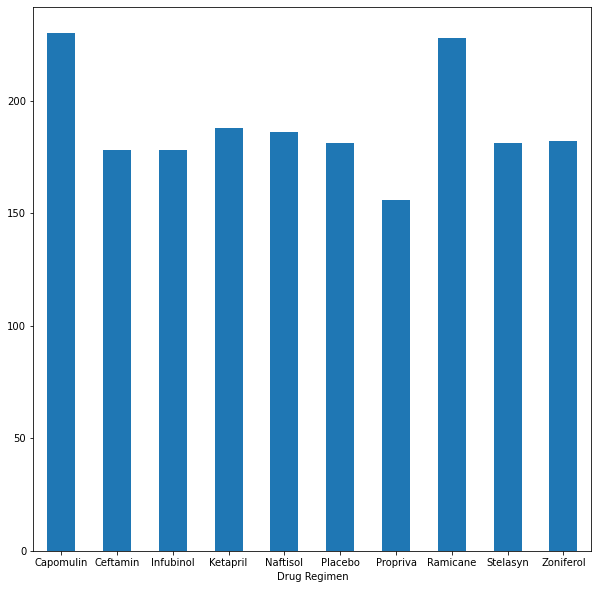

In [19]:
# Generate a bar plot showing the total number of 
#unique mice tested on each drug regimen using pandas.

totalMice = groupedMice["Mouse ID"].count()

totalMiceBar = totalMice.plot.bar(x="Drug", y = "Number of Mice", rot = 0,figsize=(10,10))
totalMiceBar

In [20]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



<AxesSubplot:ylabel='Sex'>

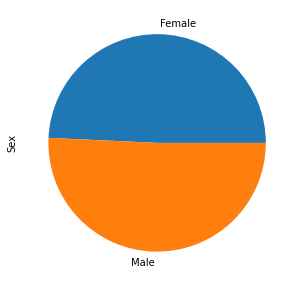

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

genderMice = cleanMice.groupby(["Sex"])
genderMice = genderMice["Mouse ID"].count()
genderMice = genderMice.rename("Sex")

totalMicePie = genderMice.plot.pie(y = "Sex", figsize=(5,5))
totalMicePie

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lastMiceTime = cleanMice.loc[cleanMice["Timepoint"]== 45,:]
capDrugs = lastMiceTime.loc[lastMiceTime["Drug Regimen"]=="Capomulin", :]
ramDrugs =lastMiceTime.loc[lastMiceTime["Drug Regimen"]=="Ramicane", :]
infDrugs = lastMiceTime.loc[lastMiceTime["Drug Regimen"]=="Infubinol", :]
cefDrugs = lastMiceTime.loc[lastMiceTime["Drug Regimen"]=="Ceftamin", :]

fourDrugsMice = pd.concat([capDrugs, ramDrugs, infDrugs, cefDrugs])
   
fourDrugsMice
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#,"Ramicane","Infubinol"  "Ceftamin"

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
...,...,...,...,...,...,...,...,...
1670,w151,Ceftamin,Male,24,25,45,67.527482,3
1773,x581,Ceftamin,Female,19,28,45,64.634949,3
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
capDrugs = capDrugs["Tumor Volume (mm3)"]
capDrugs = capDrugs.rename("Capomulin")

ramDrugs = ramDrugs["Tumor Volume (mm3)"]
ramDrugs = ramDrugs.rename("Ramicane")

infDrugs = infDrugs["Tumor Volume (mm3)"]
infDrugs = infDrugs.rename("Infubinol")

cefDrugs = cefDrugs["Tumor Volume (mm3)"]
cefDrugs = cefDrugs.rename("Ceftamin")

cefDrugs

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

493     62.999356
993     61.849023
1033    68.923185
1112    67.748662
1132    59.851956
1162    64.299830
1260    59.741901
1379    61.433892
1670    67.527482
1773    64.634949
1797    61.386660
1845    68.594745
1855    64.729837
Name: Ceftamin, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x186b8c45610>,
 'caps': [<matplotlib.lines.Line2D at 0x186b8c45cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x186b8c45280>,
 'medians': [<matplotlib.lines.Line2D at 0x186b8d973d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x186b8d97730>,
 'means': []}

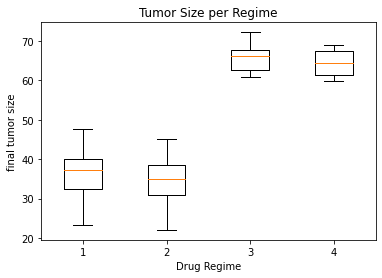

In [32]:
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Size per Regime")
ax1.set_ylabel("final tumor size")
ax1.set_xlabel("Drug Regime")
ax1.boxplot([capDrugs,ramDrugs,infDrugs,cefDrugs])

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
